<h1> DS200A Computer Vision Assignment</h1>

<h2>  Part One: Data Input </h2>	


<h3>  Import Statements </h3>	


In [2]:
#Import anything you need here
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import skimage
from skimage import data
from skimage import io
from skimage.io import imread_collection
import os
import ray

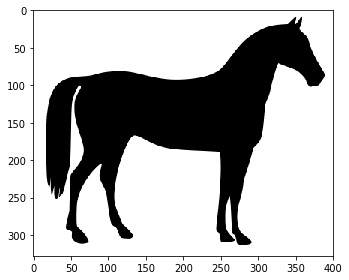

,Pictures,Encoding
0,"[[[255, 255, 255, 110], [255, 255, 255, 217], ...",1
1,"[[76, 86, 72, 69, 74, 86, 110, 110, 111, 130, ...",2


In [17]:
#Example of reading in a file


filename = os.path.join(skimage.data_dir, 'horse.png')
horse = io.imread(filename)
skimage.io.imshow(horse)

plt.show()
filename2 = os.path.join(skimage.data_dir, 'grass.png')
grass = io.imread(filename2) 
example_data_frame= pd.DataFrame()


example_data_frame['Pictures']=[horse, grass]
example_data_frame['Encoding']=[1,2]
example_data_frame

In [21]:
label_list = next(os.walk('20_categories_training/20_categories_training'))[1]
label_list.sort()
label_dict = {}
for i in range(20):
    label_dict[i] = label_list[i]
label_dict

{0: 'airplanes',
 1: 'bear',
 2: 'blimp',
 3: 'comet',
 4: 'crab',
 5: 'dog',
 6: 'dolphin',
 7: 'giraffe',
 8: 'goat',
 9: 'gorilla',
 10: 'kangaroo',
 11: 'killer-whale',
 12: 'leopards',
 13: 'llama',
 14: 'penguin',
 15: 'porcupine',
 16: 'teddy-bear',
 17: 'triceratops',
 18: 'unicorn',
 19: 'zebra'}

<h4> Using the code for reference, take the given folder and create a dataframe with the picture object, and the encoding as listed below. </h4>	
0=Airplanes, 1=Bear, 2=Blimp, 3=Comet, 4=Crab, 5=Dog, 6=Dolphin, 7=Giraffe, 8=Goat, 9=Gorilla, 10=Kangaroo, 11=Killer-Whale, 12=Leopards, 13=Llama, 14= Penguin, 15= Porcupine, 16=Teddy-Bear, 17=Triceratops, 18=Unicorn, 19=Zebra

In [69]:
def read_organize_data(file_path):
    #Fill this function out, should return a dataframe with picture object, and correct encoding
    label_list = next(os.walk(file_path))[1]
    label_list.sort()
    label_dict = {}
    for i in range(20):
        label_dict[i] = label_list[i]
    labels = list(label_dict.values())
    return_db = pd.DataFrame(columns = ['Pictures', 'Label','Encoding', 'File_Path'])
    for enc, label in label_dict.items():
        path = os.path.join(os.getcwd(),file_path + '/' + label)
        file_path_list = [path + '/' + x for x in os.listdir(path)]
        sub_db = pd.DataFrame()
        picture_list = []
        sub_db['Pictures'] = list(imread_collection(file_path_list))
        sub_db['Label'] = label
        sub_db['Encoding'] = enc
        sub_db['File_Path'] = file_path_list
        return_db = pd.concat([return_db, sub_db])
    return_db = return_db.reset_index()
    return return_db
    

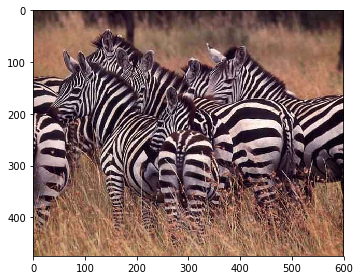

In [20]:
io.imshow(sub_df.loc[0, 'pic'])

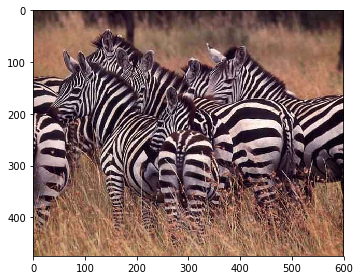

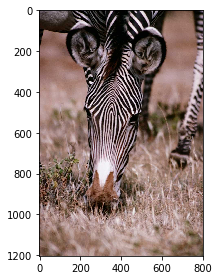

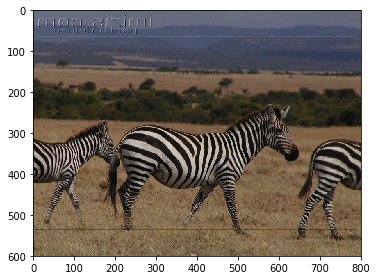

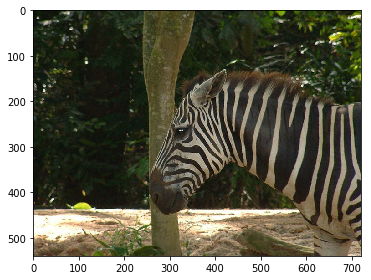

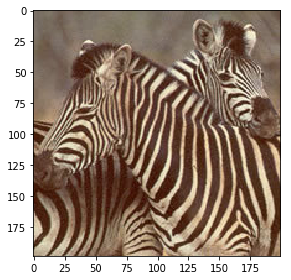

zebra


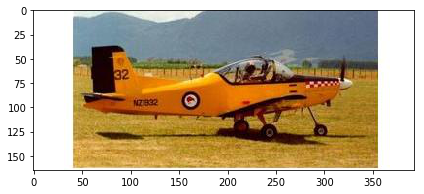

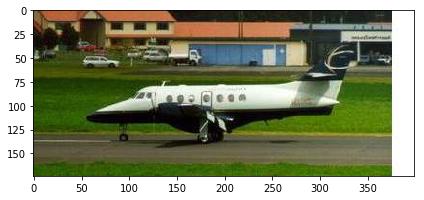

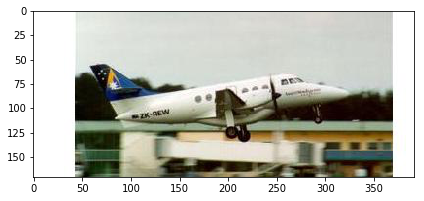

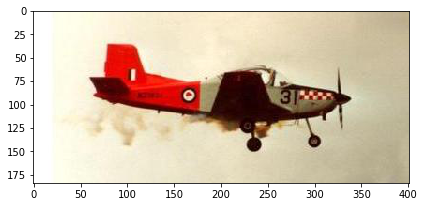

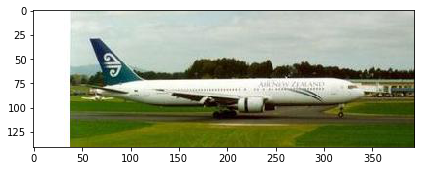

airplanes


In [60]:
label = ['zebra', 'airplanes']
file_path = '20_categories_training/20_categories_training'
df = pd.DataFrame()
for l in label:
    path = os.path.join(os.getcwd(),file_path + '/' + l)
    file_path_list = [path + '/' + x for x in os.listdir(path)]
    sub_df = pd.DataFrame()
    pic_list = []
    for file in file_path_list[0:5]:
        pic = io.imread(file)
        pic_list.append(pic)
        io.imshow(pic)
        plt.show()
    sub_df['pic'] = pic_list
    sub_df['enc'] = l
    print(sub_df.loc[0,'enc'])
    df = df.append(sub_df)
df = df.reset_index()

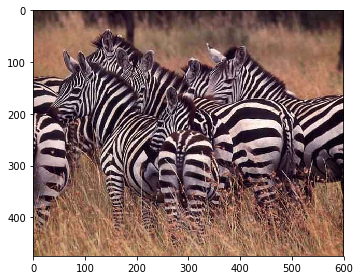

In [62]:
io.imshow(df.loc[0,'pic'])

In [70]:
starting_data = read_organize_data('20_categories_training/20_categories_training')
starting_data.head()

,index,Pictures,Label,Encoding,File_Path
0,0,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",airplanes,0,/Users/vikrant/Classes/DS 100/final_project/20...
1,1,"[[[88, 56, 17], [95, 63, 24], [101, 69, 30], [...",airplanes,0,/Users/vikrant/Classes/DS 100/final_project/20...
2,2,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",airplanes,0,/Users/vikrant/Classes/DS 100/final_project/20...
3,3,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",airplanes,0,/Users/vikrant/Classes/DS 100/final_project/20...
4,4,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",airplanes,0,/Users/vikrant/Classes/DS 100/final_project/20...


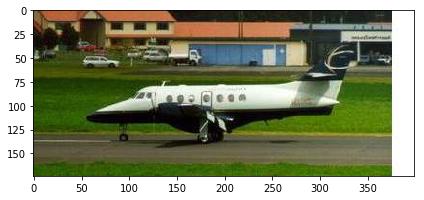

In [72]:
io.imshow(starting_data.loc[1, 'Pictures'])